##Instructions




1. For every data visualization you make, add a proper description on the axes. Even if the variable name isn't terrible, explicitly add them. This is worth 1 point per axis per problem!
2. For each question asking you to make a calculation, you must add a comment or a markdown cell explicitly answering the question. **Python output alone is insufficient.**

## 0. Load Stuff

Load the `pandas`, `matplotib`,`seaborn`, and `geopandas`libraries.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

Load in the dataframe found [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) as the variable `voters`. Make sure you are familiar with the data, whose origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

In [3]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

##Introduction (10 points)
You've been hired to work with a government organization interested in formation about voter registration in the United States. They have asked you to come up with two research questions--one about national trends and one about a state trend of your choice.

Clearly state:
* the purpose of your project
* what the goal is
* why it is important for someone to read this notebook?

In additon, state your two research questions

* Question 1:
* Question 2:



## 1. Data Processing (8 points)

Show the first five rows of data and explain what the variable names are. (5 points)

In [4]:
voters.head(5)
#response below

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229



*  The jurisdiction variable displays the state the voters belong to
*  The year variable displays year the voters registered
*  The month variable displays the month the voters registered
*  The voters variable displays how many voters registered per the aforementioned variables


Check for any missing data data. (1 point)

In [ ]:
voters.isnull().values.any()

False

Check your data types. (1 point)

In [ ]:
voters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NAME               106 non-null    object
 1   Year               106 non-null    int64 
 2   Month              106 non-null    object
 3   registered_voters  106 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.4+ KB


Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook. (2 points)

In [5]:
voters = voters.rename(columns={"Jurisdiction":"NAME"})
voters = voters.rename(columns={"New registered voters":"registered_voters"})

In [6]:
voters.columns

Index(['NAME', 'Year', 'Month', 'registered_voters'], dtype='object')

Explain any potential limitations to your data (2 points)

In [ ]:
#response below

The data lacks specific information/details about the voters, like race, gender, and age. There are only so many observations that can be made with the number of registered voters.

###Exploratory Data Analysis (20 points, as noted)

When was the highest amount of new voter registration? Show the state, month, year, and number of registered voters. (5 points)



In [15]:
voters[["NAME", "Month", "Year", "registered_voters"]].sort_values(by = "registered_voters", ascending = False).head(1)

,NAME,Month,Year,registered_voters
13,California,Feb,2020,238281


What is the average voter registration? (1 points)

In [16]:
voters["registered_voters"].mean()

48223.46226415094

Create a dataframe called "high_voters" showing only the times where voter registration was higher than your above average. How many times did this happen? (3 points)


In [36]:
high_voters = voters.loc[voters.registered_voters > 48223.46226415094]

In [ ]:
#response below

Voter registration was higher than the average 36 times.

How many times did each state go above the national average for new voter registration? (2 points)



In [38]:
high_voters[["NAME", "registered_voters"]].groupby(by = "NAME").head(36)

,NAME,registered_voters
1,Arizona,51155
2,Arizona,48614
5,Arizona,50853
8,California,87574
9,California,103377
10,California,174278
11,California,185478
12,California,151595
13,California,238281
14,California,176810


In [40]:
high_voters.groupby("NAME")["registered_voters"].mode()

AttributeError: 'SeriesGroupBy' object has no attribute 'mode'

In [ ]:
#response below


*  Arizona - 3 times
*  California - 7 times
*  Florida - 7 times
*  Georgia - 1 time
*  Illinois - 4 times
*  North Carolina - 6 times
*  Texas - 8 times


Which three states had the highest average voter registration overall? Show only the top three results. (5 points)

In [48]:
highest_voters = high_voters.groupby("NAME")["registered_voters"].mean()
highest_voters.sort_values(ascending=False).head(3)

,registered_voters
NAME,
California,159627.571429
Texas,134466.125000
Illinois,74252.250000


##Data Visualization (30 points, as marked)

Create a plot showing the voter registratation by state.
* A dataframe/a way to show the total voters registered per state. If you create a new dataframe, you may need to include `reset_index()`.(3 points)
* A figure size of 10,10 (1 point)
* Clearly legible labels and titles (2 points)
* A color palette that is not the default palette (1 point)
* Comment on the trends you see (2 points)


(9 points total)

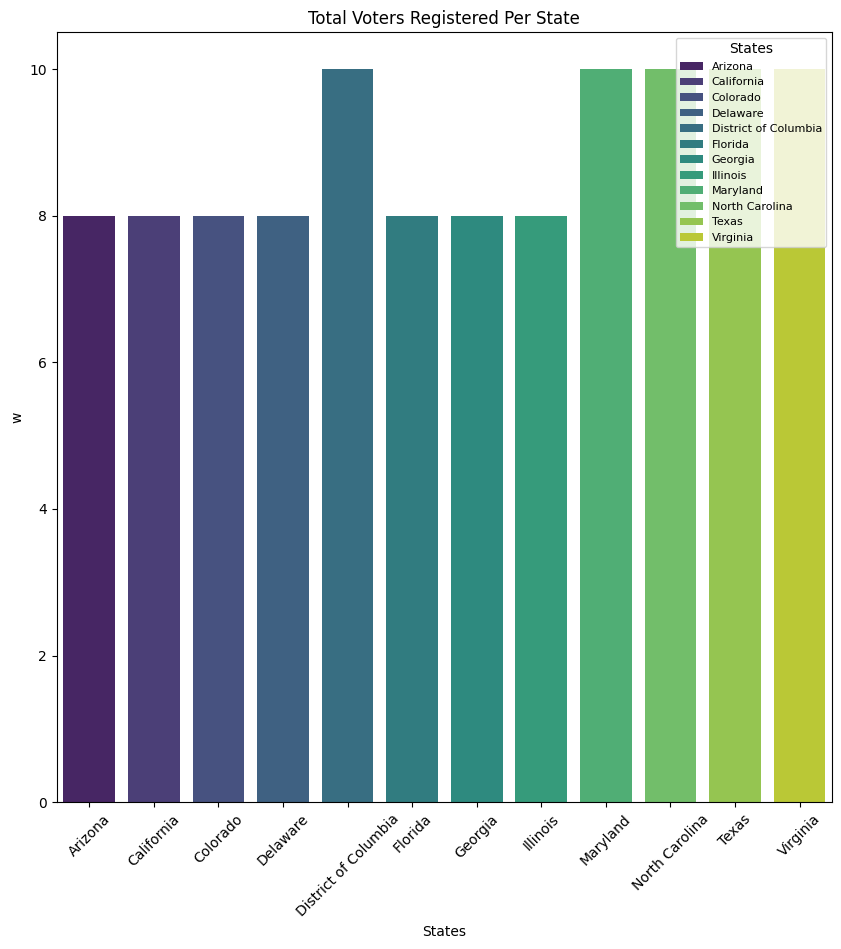

In [89]:
label = ["Arizona", "California", "Colorado", "Delaware", "District of Columbia", "Florida", "Georgia", "Illinois", "Maryland", "North Carolina", "Texas", "Virginia"]
plt.figure(figsize=(10,10))
sns.countplot(voters, x="NAME", palette="viridis", hue="NAME")
plt.xlabel("States",fontsize=10)
plt.ylabel("w",fontsize=10)
plt.title("Total Voters Registered Per State")
plt.legend(labels = label, title = "States", fontsize = 8)
plt.xticks(ticks = range(len(label)), labels = label, rotation = 45)
plt.show()

Produce a plot comparing voter registation in 2016 and 2020. (2 pts)
* Color the graph based on the month.(1 pt)
* Change the default color palette used. (1 pt)
* Comment on any trends you see. (2 pts)
* Add the appropriate labels and title (1)
* Comment on any trends you see (2 points)

(9 pts total)

Create a data visualization that relates to either your state level research question or your national level reserach question. If one of your questions was answered by the above graphs, you may not use that question. (12 points)

##Mapping (14 points as noted)

Load in our shape file data from the mapping unit.

In [70]:
!git clone https://github.com/SFord87/325-Datasets

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 11.50 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [73]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

states = gpd.read_file(shapefile)

Set our continental US bounding box to us for the next questions. (2 points)

In [71]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358

In [74]:
bbox = states.cx[minx:maxx, miny:maxy]

Create a dataframe that shows the average voter registration per state. (2 points)

In [9]:
bbox.columns

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')

In [15]:
voters.columns

Index(['NAME', 'Year', 'Month', 'registered_voters'], dtype='object')

Merge the above dataframe results with the mapping data. You will want to use `inner` for the `how` argument. (2 points)

In [75]:
state_pops= bbox.merge(voters, on="NAME", how="inner")

Make a map featuring the following

*  a figure size of 25, 15 (1 point)
*  A boundary map of the continental US data, with a black linewidth of .25 (2 points)
*  The states that we have the voter registration information for highlighted in a color map of your choice. (3 points)
*  A legend and a title. (2 points)

*Bonus point: add the state abbrevations and average number of registered voters to the map* (1 point)

(8 points total)

<Figure size 2500x1500 with 0 Axes>

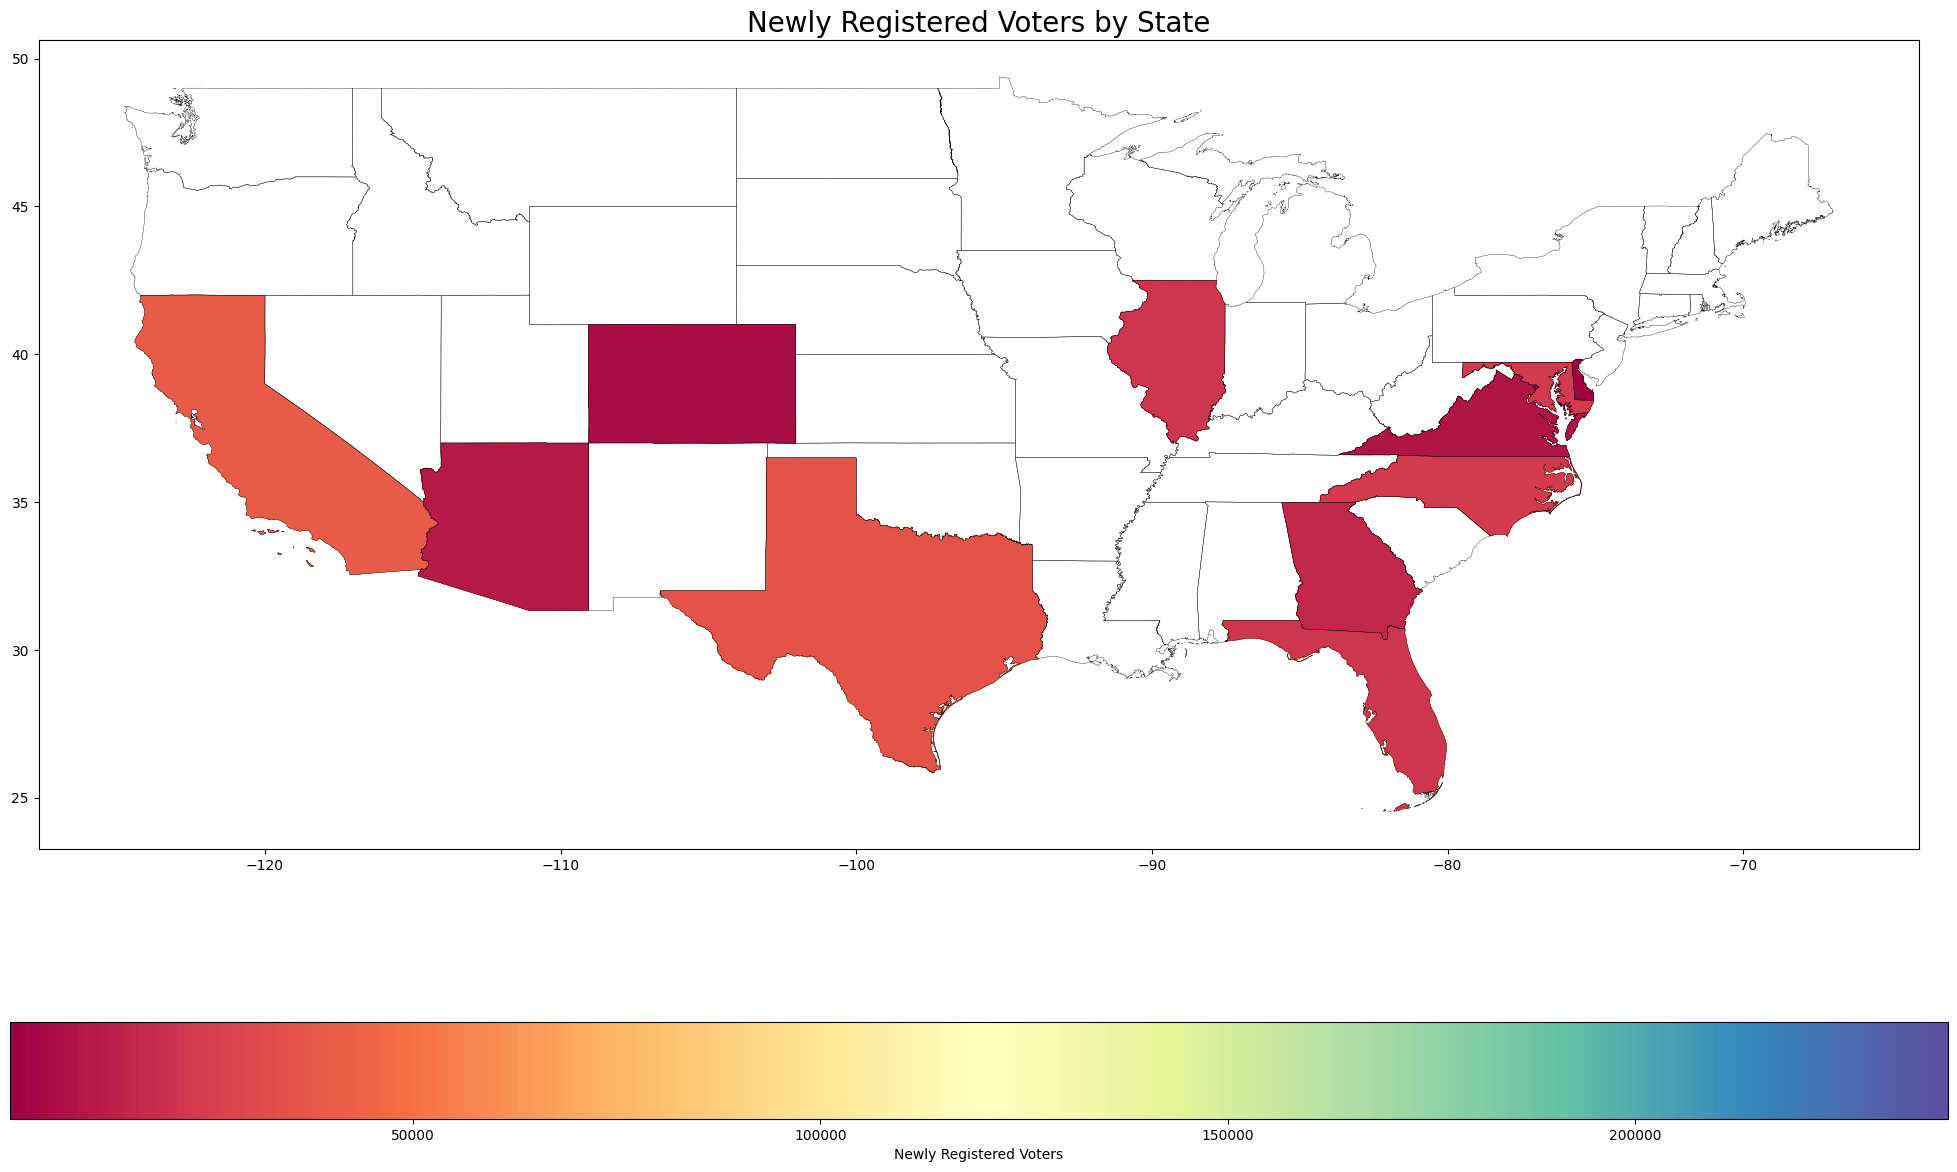

In [101]:
fig = plt.figure(1,figsize=(25,15))
us_map = bbox.boundary.plot(figsize=(25,15),linewidth=.25, color="black")
state_pops.plot(column="registered_voters", ax=us_map, legend=True,cmap="Spectral",
            legend_kwds={"label": "Newly Registered Voters",
            "orientation": "horizontal"})
us_map.axis("on")
plt.title("Newly Registered Voters by State", fontsize=20)
plt.show()

##Conclusion  (15 points)

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)


Each section should be at least 3-4 complete sentenes.


##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.